<a href="https://colab.research.google.com/github/KunalSharma2001/Data-Analysis-Projects/blob/main/NYC_Airbnb_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [5]:
nyc_logs = pd.read_csv("/content/AB_NYC_2019.csv")
nyc_logs.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [6]:
nyc_logs.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
43422,33643819,"Premier room in Downtown NY, Two Bridges,China...",253552326.0,Grace,Manhattan,Chinatown,40.71313,-73.99615,Private room,108.0,1.0,11.0,2019-06-23,3.71,4.0,175.0
43423,33644836,"Priv room in an immaculate Apt,near Cent Park,...",76628403.0,Matt,Manhattan,Upper West Side,40.77961,-73.97821,Private room,160.0,2.0,3.0,2019-06-30,1.13,1.0,61.0
43424,33645301,1718公馆套房,119692067.0,Qiulan,Brooklyn,Sunset Park,40.64403,-74.00087,Private room,60.0,1.0,0.0,NaN,NaN,3.0,89.0
43425,33645723,Cute private room in Washington Heights!,112531390.0,Rachel,Manhattan,Washington Heights,40.84427,-73.93742,Private room,52.0,1.0,1.0,2019-04-25,0.40,1.0,0.0
43426,33650779,Central Manhattan Ladies Only (S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
nyc_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43427 entries, 0 to 43426
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43427 non-null  int64  
 1   name                            43411 non-null  object 
 2   host_id                         43426 non-null  float64
 3   host_name                       43405 non-null  object 
 4   neighbourhood_group             43426 non-null  object 
 5   neighbourhood                   43426 non-null  object 
 6   latitude                        43426 non-null  float64
 7   longitude                       43426 non-null  float64
 8   room_type                       43426 non-null  object 
 9   price                           43426 non-null  float64
 10  minimum_nights                  43426 non-null  float64
 11  number_of_reviews               43426 non-null  float64
 12  last_review                     

# Insights
---
There are 15 columns and about 48894 rows in the given dataset.
According to the .info()
The NaN/Null values in the data are:
1. Name
2. Host-Name
3. Last-Review
4. Reviews-per-month

Reasons for the missing values:
1. The host or the person might have forgetten to enter the values in the dataset.
2. Hardware or Software Errors in the collecion may affect the data.

---
Therefore, we can either remove these rows or we can fill them with the mean values of the column.



# **Identifying and Replacing the Missing Values**

In [8]:
print("Rows with missing values for Name")
print(nyc_logs['name'].isnull().value_counts())
print("\n")
print("Rows with missing value for Host_Name")
print(nyc_logs['host_name'].isnull().value_counts())
print("\n")
print("Rows with missing value for Last_Review")
print(nyc_logs['last_review'].isnull().value_counts())
print("\n")
print("Rows with missing values with Reviews_Per_Month")
print(nyc_logs['reviews_per_month'].isnull().value_counts())

Rows with missing values for Name
False    43411
True        16
Name: name, dtype: int64


Rows with missing value for Host_Name
False    43405
True        22
Name: host_name, dtype: int64


Rows with missing value for Last_Review
False    36053
True      7374
Name: last_review, dtype: int64


Rows with missing values with Reviews_Per_Month
False    36053
True      7374
Name: reviews_per_month, dtype: int64


# **Replacing Missing Values**

In [9]:
nyc_logs['reviews_per_month'] = nyc_logs['reviews_per_month'].fillna(0.0)
nyc_logs.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,0.00,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0
6,5121,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0
7,5178,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0
8,5203,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0


In [10]:
print(nyc_logs['reviews_per_month'].isnull().value_counts())

False    43427
Name: reviews_per_month, dtype: int64


In [11]:
nyc_logs['last_review'] = nyc_logs['last_review'].fillna('2016-12-31')
nyc_logs.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,2016-12-31,0.00,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0
6,5121,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0
7,5178,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0
8,5203,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0


In [12]:
# Checking, any NULL values in the data
nyc_logs['last_review'].isnull().value_counts()

False    43427
Name: last_review, dtype: int64

# **Deleting the Missing Values from the Data**

In [13]:
nyc_logs['name'].isnull().value_counts()

False    43411
True        16
Name: name, dtype: int64

We deleted the NULL rows in Column 'Name', as there was no values for those rows, thus we cannot depict the name and thus the whole row is of no use.

In [14]:
nyc_logs.dropna(subset=['name'], inplace = True)
nyc_logs['name'].isnull().value_counts()
# Here we have deleted the NULL values from the column = 'name'.

False    43411
Name: name, dtype: int64

In [15]:
nyc_logs['host_name'].isnull().value_counts()

False    43389
True        22
Name: host_name, dtype: int64

In [16]:
nyc_logs.dropna(subset=['host_name'], inplace=True)
nyc_logs['host_name'].isnull().value_counts()

False    43389
Name: host_name, dtype: int64

In [17]:
nyc_logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43389 entries, 0 to 43425
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43389 non-null  int64  
 1   name                            43389 non-null  object 
 2   host_id                         43389 non-null  float64
 3   host_name                       43389 non-null  object 
 4   neighbourhood_group             43389 non-null  object 
 5   neighbourhood                   43389 non-null  object 
 6   latitude                        43389 non-null  float64
 7   longitude                       43389 non-null  float64
 8   room_type                       43389 non-null  object 
 9   price                           43389 non-null  float64
 10  minimum_nights                  43389 non-null  float64
 11  number_of_reviews               43389 non-null  float64
 12  last_review                     

# **Correcting the format of Data**

In [18]:
nyc_logs['last_review'] = pd.to_datetime(nyc_logs['last_review'])

In [19]:
nyc_logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43389 entries, 0 to 43425
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              43389 non-null  int64         
 1   name                            43389 non-null  object        
 2   host_id                         43389 non-null  float64       
 3   host_name                       43389 non-null  object        
 4   neighbourhood_group             43389 non-null  object        
 5   neighbourhood                   43389 non-null  object        
 6   latitude                        43389 non-null  float64       
 7   longitude                       43389 non-null  float64       
 8   room_type                       43389 non-null  object        
 9   price                           43389 non-null  float64       
 10  minimum_nights                  43389 non-null  float64       
 11  nu

In [20]:
nyc_logs['host_id'] = nyc_logs['host_id'].astype(str)

In [21]:
nyc_logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43389 entries, 0 to 43425
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              43389 non-null  int64         
 1   name                            43389 non-null  object        
 2   host_id                         43389 non-null  object        
 3   host_name                       43389 non-null  object        
 4   neighbourhood_group             43389 non-null  object        
 5   neighbourhood                   43389 non-null  object        
 6   latitude                        43389 non-null  float64       
 7   longitude                       43389 non-null  float64       
 8   room_type                       43389 non-null  object        
 9   price                           43389 non-null  float64       
 10  minimum_nights                  43389 non-null  float64       
 11  nu

# **Creating New Features to add in the Data**

In [22]:
# Creating the column Month with the Name of Month
nyc_logs['month'] = nyc_logs['last_review'].apply(lambda time : time.month)

In [23]:
nyc_logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43389 entries, 0 to 43425
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              43389 non-null  int64         
 1   name                            43389 non-null  object        
 2   host_id                         43389 non-null  object        
 3   host_name                       43389 non-null  object        
 4   neighbourhood_group             43389 non-null  object        
 5   neighbourhood                   43389 non-null  object        
 6   latitude                        43389 non-null  float64       
 7   longitude                       43389 non-null  float64       
 8   room_type                       43389 non-null  object        
 9   price                           43389 non-null  float64       
 10  minimum_nights                  43389 non-null  float64       
 11  nu

In [24]:
month_name = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

In [25]:
nyc_logs['month'] = nyc_logs['month'].map(month_name)

In [26]:
nyc_logs.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,October
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,May
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,2016-12-31,0.00,1.0,365.0,December
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0,July
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0,November
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0,June
6,5121,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0,October
7,5178,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0,June
8,5203,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0,July
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0,June


# **Listing the Coordinated**

In [27]:
# Creaiting a DataFrame for the 'longitude and latitude'
location_logs = nyc_logs[['latitude', 'longitude']]

# Creating a list of tuples
location_logs = location_logs.to_records(index=False)

# There is now a column which have the listing named as Longitude and Latitude for the Data 
nyc_logs['listing_coordinates'] =   list(location_logs)

In [28]:
nyc_logs.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month,listing_coordinates
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,October,"[40.64749, -73.97237]"
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,May,"[40.75362, -73.98377]"
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,2016-12-31,0.00,1.0,365.0,December,"[40.80902, -73.9419]"
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0,July,"[40.68514, -73.95976]"
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0,November,"[40.79851, -73.94399]"
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0,June,"[40.74767, -73.975]"
6,5121,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0,October,"[40.68688, -73.95596]"
7,5178,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0,June,"[40.76489, -73.98493]"
8,5203,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0,July,"[40.80178, -73.96723]"
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0,June,"[40.71344, -73.99037]"


# **Major Attractions in the NYC**

In [29]:
nyc_logs['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Major attractions in the NYC Neighbourhood :
Brooklyn: Brooklyn Bridge

*   Brooklyn : Brooklyn Bridge
*   Manhattan : Central Park
*   Staten Island : St. George's Ferry Terminal (Staten Island Ferry )
* Queens: Citi Field
* Bronx: Bronx Zoo

In [30]:
# Entering the coordinated of the famous attractions
brooklyn_bridge = (40.706001,-73.997002)
central_park = (40.769361,-73.977655)
citi_field = (40.75416365,-73.84082997)
staten_island_ferry = (40.643333,-74.074167) 
bronx_zoo = (40.852905,-73.872971)

In [31]:
# Dictionary with place and neighbour hood attractions
locations = {'Brooklyn':"Brooklyn Bridge", 'Manhattan':"Central Park", 'Staten Island':"St.George's  Ferry Terminal", 'Queens':"Citi Field", 'Bronx':"Bronx Zoo"}

# Dictionary with neighbourhood and coordinates
coordinates = {'Brooklyn':brooklyn_bridge, 'Manhattan':central_park, 'Queens':citi_field, 'Bronx':bronx_zoo, 'Staten Island':staten_island_ferry}

# mapping locations witht the coordinates
nyc_logs['major_attractions'] = nyc_logs['neighbourhood_group'].map(locations)
nyc_logs['major_attractions_coordinates'] = nyc_logs['neighbourhood_group'].map(coordinates)


In [32]:
pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
# here we use haversine, it is a library in python which is used to calculate distance (in various units) between two points on Earth using their latitude and longitude.
import haversine
from haversine import haversine, Unit

In [34]:
#haversine can calculate the distance (in various units) between two points on Earth using their latitude and longitude.


# We use the lambda function to apply haversine to calculate the distance to central park from each listing in Miles
# The default units for haversine are Km but we have set it to Miles here
# x.listing_coordinates and x.major_attraction_coordinates represent the coordinates of the listing location and the major attraction
# nyc_df['distance_to_major_attractions'] = nyc_df.apply(lambda x: haversine(x.listing_coordinates,x.major_attraction_coordinates,unit=Unit.MILES), axis = 1)

nyc_logs['distance_to_majorAttractions'] = nyc_logs.apply(lambda x : haversine(x.listing_coordinates, x.major_attractions_coordinates ,unit=Unit.MILES), axis = 1)

# Rounding the values for easynes
nyc_logs['distance_to_majorAttractions'] = nyc_logs['distance_to_majorAttractions'].round(2)



# **Checking the Correlation in the Data**

<AxesSubplot:>

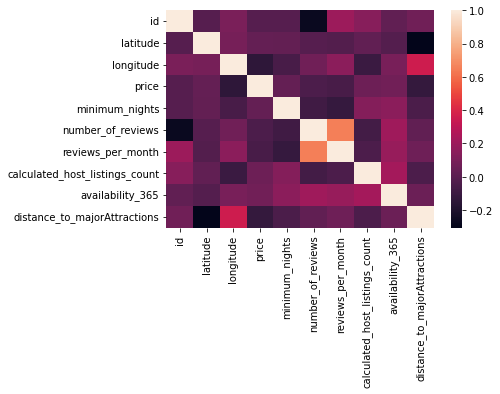

In [35]:
sns.heatmap(nyc_logs.corr())